In [52]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [54]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [55]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [56]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [57]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mount isa au
rikitea pf
new norfolk au
busselton au
busselton au
victoria sc
nanortalik gl
marawi sd
kapaa us
ushuaia ar
klaksvik fo
cabo san lucas mx
aykhal ru
valparaiso cl
margate za
oistins bb
hasaki jp
narsaq gl
mrakovo ru
qaanaaq gl
dryden ca
mataura pf
ust-nera ru
busselton au
luwuk id
rikitea pf
avarua ck
arraial do cabo br
borogontsy ru
dombarovskiy ru
saldanha za
longyearbyen sj
vaini to
edgewater us
albany au
mataura pf
ferkessedougou ci
busselton au
tura ru
warwick au
carmen cr
namatanai pg
chuy uy
nizhneyansk ru
cherskiy ru
safranbolu tr
hambantota lk
puerto ayora ec
vestmannaeyjar is
chapais ca
port elizabeth za
thompson ca
bayshore gardens us
taolanaro mg
bluff nz
saskylakh ru
cape town za
chuy uy
bergen nl
albany au
hilo us
souillac mu
busselton au
hamilton bm
hermanus za
bluff nz
bonavista ca
wanning cn
kaitangata nz
thompson ca
hobart au
arraial do cabo br
port alfred za
pevek ru
troitskoye ru
mataura pf
port elizabeth za
namie jp
busselton au
cooma au
guerrero negro 

chuy uy
mataura pf
ligayan ph
cedar city us
busselton au
cidreira br
castro cl
juneau us
bluff nz
mataura pf
phumi samraong kh
sola vu
reconquista ar
sidi bu zayd tn
grindavik is
alyangula au
bonfim br
lebu cl
atuona pf
port alfred za
north bend us
jamestown sh
oranjemund na
enshi cn
boyolangu id
upernavik gl
rikitea pf
evensk ru
albany au
de aar za
hervey bay au
vaini to
grand river south east mu
albany au
cherskiy ru
korla cn
tasiilaq gl
srednekolymsk ru
barrow us
provideniya ru
leningradskiy ru
kapaa us
charlestown kn
atuona pf
port lincoln au
punta arenas cl
butaritari ki
busselton au
new norfolk au
killybegs ie
kapaa us
laguna br
ushuaia ar
pangnirtung ca
vostok ru
hermanus za
thompson ca
tukrah ly
vanimo pg
vaini to
garoua cm
deputatskiy ru
taranagar in
lusambo cd
qaanaaq gl
ambilobe mg
atlanta us
rikitea pf
dikson ru
killybegs ie
severo-kurilsk ru
iqaluit ca
samalaeulu ws
awjilah ly
rikitea pf
vaini to
atuona pf
dingle ie
iqaluit ca
pavlogradka ru
pisco pe
kandrian pg
hilo us
no

saldanha za
sakakah sa
farafangana mg
atasu kz
hofn is
yellowknife ca
acapulco mx
vaini to
severobaykalsk ru
codrington ag
katsuura jp
port shepstone za
belushya guba ru
kununurra au
mataura pf
amderma ru
aykhal ru
rikitea pf
dhidhdhoo mv
avarua ck
maniitsoq gl
ribeira grande pt
hithadhoo mv
port macquarie au
bethel us
beloha mg
pangnirtung ca
tasiilaq gl
cape town za
taoudenni ml
yegorlykskaya ru
hovd mn
puerto ayora ec
paradwip in
vila do maio cv
punta arenas cl
bathsheba bb
busselton au
yabrud sy
busselton au
atuona pf
ushuaia ar
busselton au
broken hill au


In [58]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests


In [59]:
# Import the API key.
from config import weather_api_key

In [60]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [61]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount isa
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | nanortalik
Processing Record 7 of Set 1 | marawi
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | aykhal
Processing Record 13 of Set 1 | valparaiso
Processing Record 14 of Set 1 | margate
Processing Record 15 of Set 1 | oistins
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | mrakovo
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | dryden
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | ust-nera
Processing Record 23 of Set 1 | luwuk
Processing Rec

Processing Record 38 of Set 4 | mao
Processing Record 39 of Set 4 | itarema
Processing Record 40 of Set 4 | lagoa
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | gizo
Processing Record 43 of Set 4 | caravelas
Processing Record 44 of Set 4 | kawalu
Processing Record 45 of Set 4 | bambous virieux
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | faanui
Processing Record 48 of Set 4 | bredasdorp
Processing Record 49 of Set 4 | mopti
Processing Record 50 of Set 4 | bonthe
Processing Record 1 of Set 5 | virginia beach
Processing Record 2 of Set 5 | harsin
Processing Record 3 of Set 5 | bathsheba
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | ipira
Processing Record 6 of Set 5 | bowen
Processing Record 7 of Set 5 | los llanos de aridane
Processing Record 8 of Set 5 | dikson
Processing Record 9 of Set 5 | mar del plata
Processing Record 10 of Set 5 | puerto del rosario
Processing Record 11 of

Processing Record 25 of Set 8 | charlestown
Processing Record 26 of Set 8 | killybegs
Processing Record 27 of Set 8 | pangnirtung
Processing Record 28 of Set 8 | vostok
Processing Record 29 of Set 8 | tukrah
Processing Record 30 of Set 8 | vanimo
Processing Record 31 of Set 8 | garoua
Processing Record 32 of Set 8 | taranagar
Processing Record 33 of Set 8 | lusambo
Processing Record 34 of Set 8 | ambilobe
Processing Record 35 of Set 8 | atlanta
Processing Record 36 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 37 of Set 8 | awjilah
Processing Record 38 of Set 8 | dingle
Processing Record 39 of Set 8 | pavlogradka
Processing Record 40 of Set 8 | pisco
Processing Record 41 of Set 8 | kandrian
Processing Record 42 of Set 8 | nokaneng
Processing Record 43 of Set 8 | egvekinot
Processing Record 44 of Set 8 | vilyuysk
Processing Record 45 of Set 8 | sibolga
Processing Record 46 of Set 8 | sorland
Processing Record 47 of Set 8 | yulara
Processing Record 48 of Set 8 | gal

Processing Record 17 of Set 12 | paka
Processing Record 18 of Set 12 | dergachi
Processing Record 19 of Set 12 | oriximina
Processing Record 20 of Set 12 | dickinson
Processing Record 21 of Set 12 | tucupita
Processing Record 22 of Set 12 | padang
Processing Record 23 of Set 12 | lemesos
City not found. Skipping...
Processing Record 24 of Set 12 | namwala
Processing Record 25 of Set 12 | kaohsiung
Processing Record 26 of Set 12 | belyy yar
Processing Record 27 of Set 12 | izhma
Processing Record 28 of Set 12 | trat
Processing Record 29 of Set 12 | barbar
City not found. Skipping...
Processing Record 30 of Set 12 | sao joao da barra
Processing Record 31 of Set 12 | taft
Processing Record 32 of Set 12 | samusu
City not found. Skipping...
Processing Record 33 of Set 12 | mirnyy
Processing Record 34 of Set 12 | kouango
Processing Record 35 of Set 12 | kismayo
Processing Record 36 of Set 12 | vardo
Processing Record 37 of Set 12 | waingapu
Processing Record 38 of Set 12 | labuhan
Processing

In [62]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Isa,-20.7333,139.5000,58.77,44,0,0.00,AU,2022-09-14 15:40:17
1,Rikitea,-23.1203,-134.9692,70.34,75,100,9.28,PF,2022-09-14 15:38:13
2,New Norfolk,-42.7826,147.0587,44.10,97,22,2.89,AU,2022-09-14 15:40:17
3,Busselton,-33.6500,115.3333,55.78,73,95,13.04,AU,2022-09-14 15:35:33
4,Victoria,22.2855,114.1577,91.18,57,0,3.00,HK,2022-09-14 15:40:18
5,Nanortalik,60.1432,-45.2371,49.21,67,89,4.88,GL,2022-09-14 15:40:18
6,Marawi,7.9986,124.2928,69.55,94,100,1.90,PH,2022-09-14 15:40:18
7,Kapaa,22.0752,-159.3190,75.52,86,75,4.61,US,2022-09-14 15:40:19
8,Ushuaia,-54.8000,-68.3000,46.06,31,0,4.61,AR,2022-09-14 15:36:20
9,Klaksvik,62.2266,-6.5890,49.12,85,20,22.30,FO,2022-09-14 15:40:19


In [63]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(20)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mount Isa,AU,2022-09-14 15:40:17,-20.7333,139.5000,58.77,44,0,0.00
1,Rikitea,PF,2022-09-14 15:38:13,-23.1203,-134.9692,70.34,75,100,9.28
2,New Norfolk,AU,2022-09-14 15:40:17,-42.7826,147.0587,44.10,97,22,2.89
3,Busselton,AU,2022-09-14 15:35:33,-33.6500,115.3333,55.78,73,95,13.04
4,Victoria,HK,2022-09-14 15:40:18,22.2855,114.1577,91.18,57,0,3.00
5,Nanortalik,GL,2022-09-14 15:40:18,60.1432,-45.2371,49.21,67,89,4.88
6,Marawi,PH,2022-09-14 15:40:18,7.9986,124.2928,69.55,94,100,1.90
7,Kapaa,US,2022-09-14 15:40:19,22.0752,-159.3190,75.52,86,75,4.61
8,Ushuaia,AR,2022-09-14 15:36:20,-54.8000,-68.3000,46.06,31,0,4.61
9,Klaksvik,FO,2022-09-14 15:40:19,62.2266,-6.5890,49.12,85,20,22.30


In [64]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [65]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

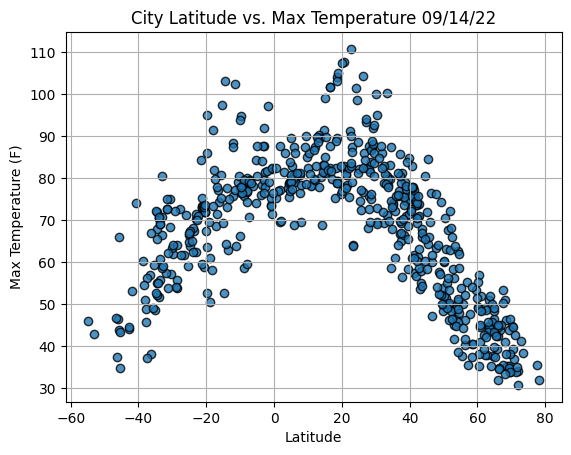

In [66]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

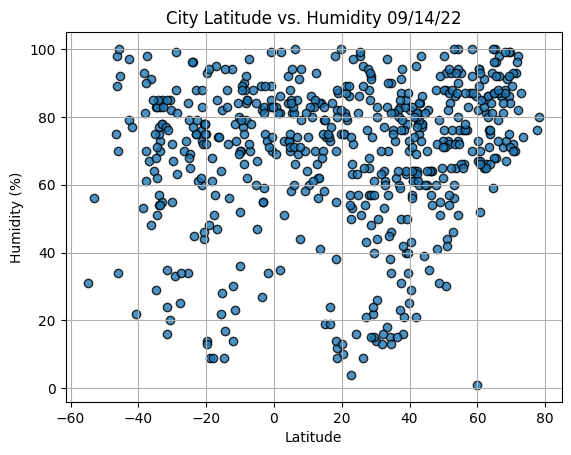

In [67]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

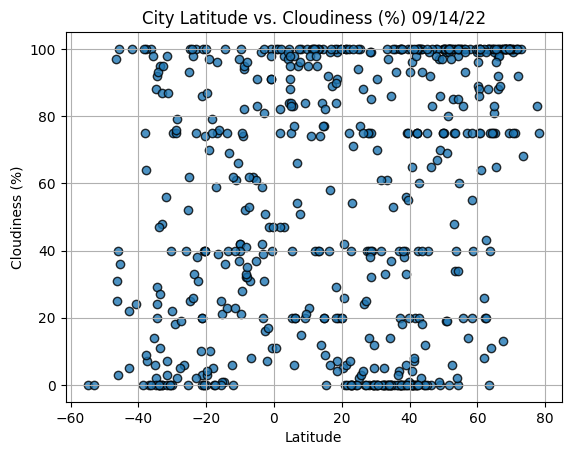

In [68]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

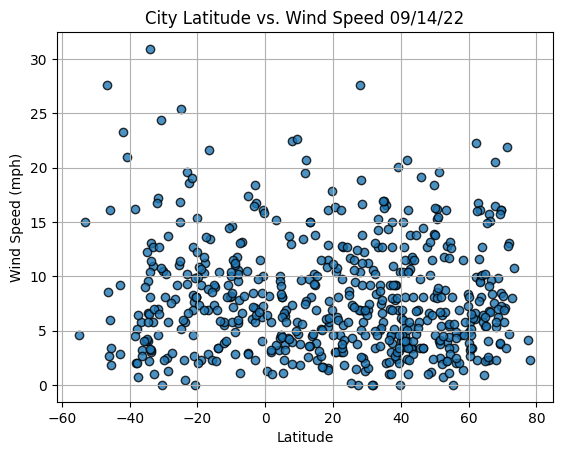

In [69]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [70]:
index13 = city_data_df.loc[13]
index13

City                      Margate
Country                        GB
Date          2022-09-14 15:36:35
Lat                       51.3813
Lng                        1.3862
Max Temp                    67.69
Humidity                       73
Cloudiness                     80
Wind Speed                    4.0
Name: 13, dtype: object

In [71]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [72]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

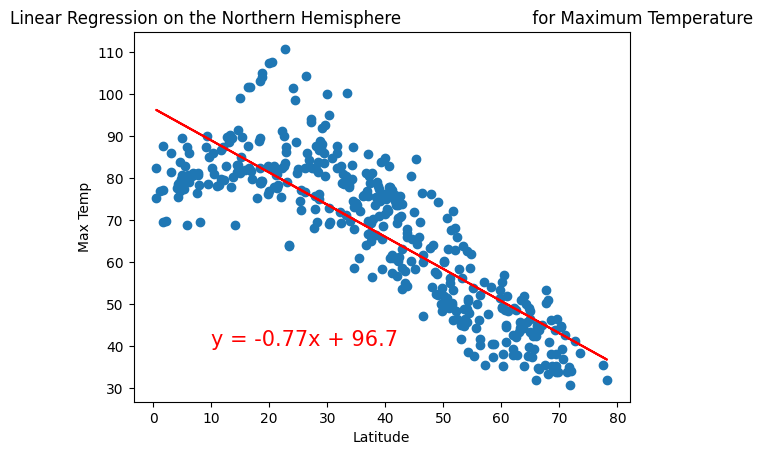

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

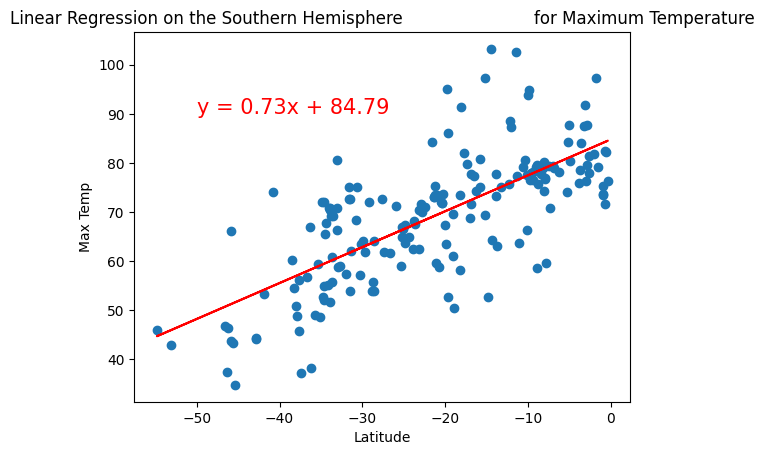

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# Find the Correlation Between Latitude and Percent Humidity

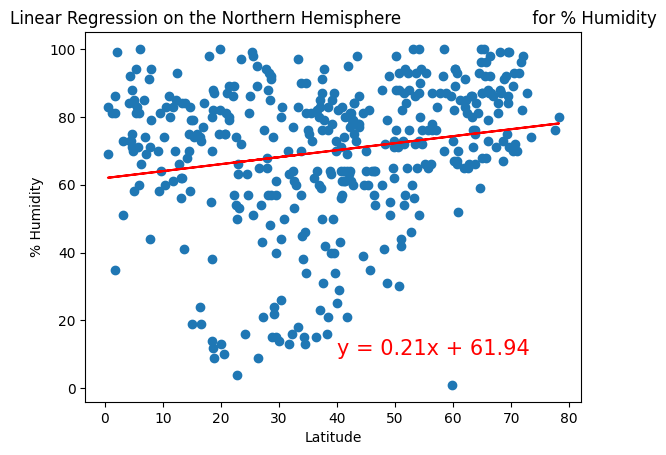

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

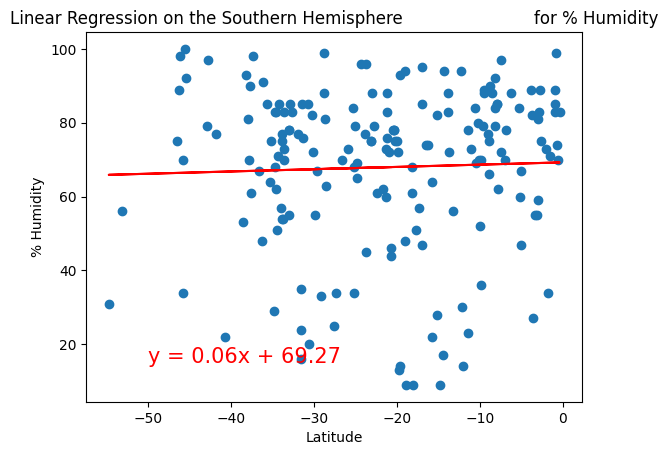

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

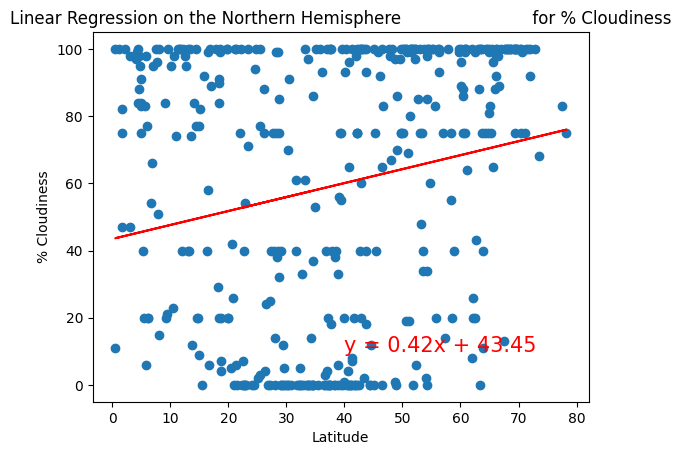

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

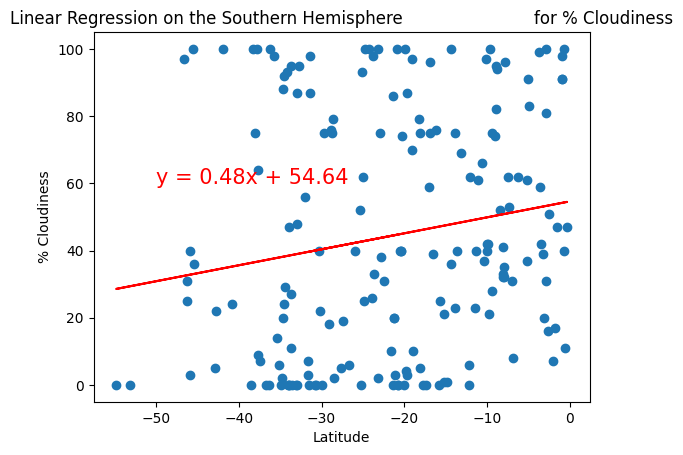

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

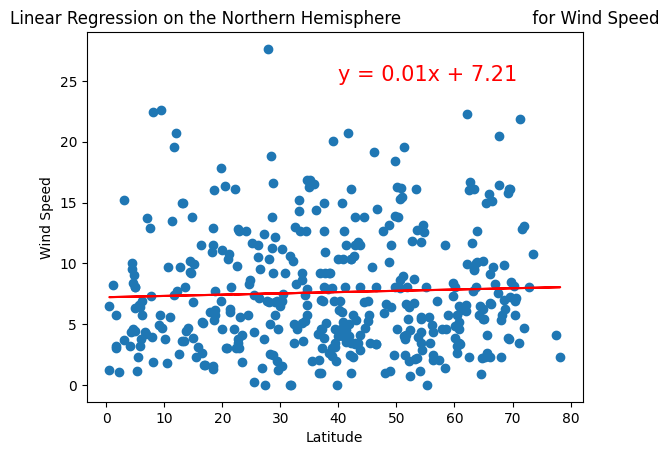

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

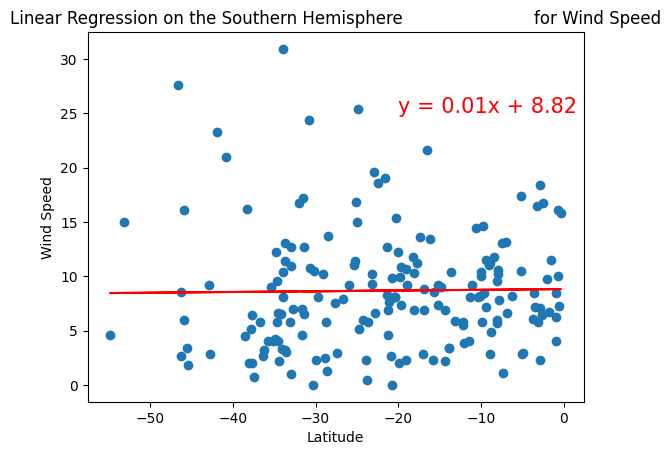

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-20,25))